In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [42]:
flights = sns.load_dataset("flights")
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


<Axes: xlabel='year', ylabel='passengers'>

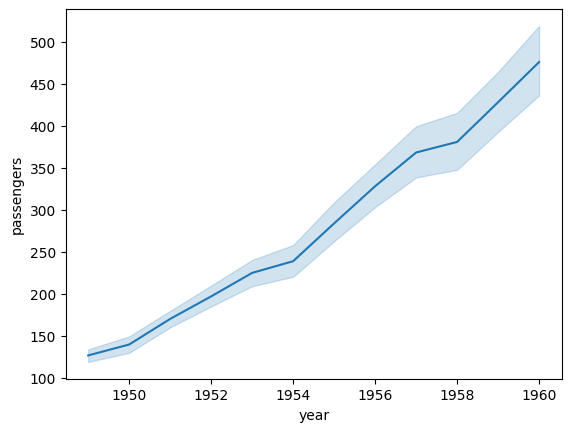

In [43]:
sns.lineplot(data=flights, x="year", y="passengers")

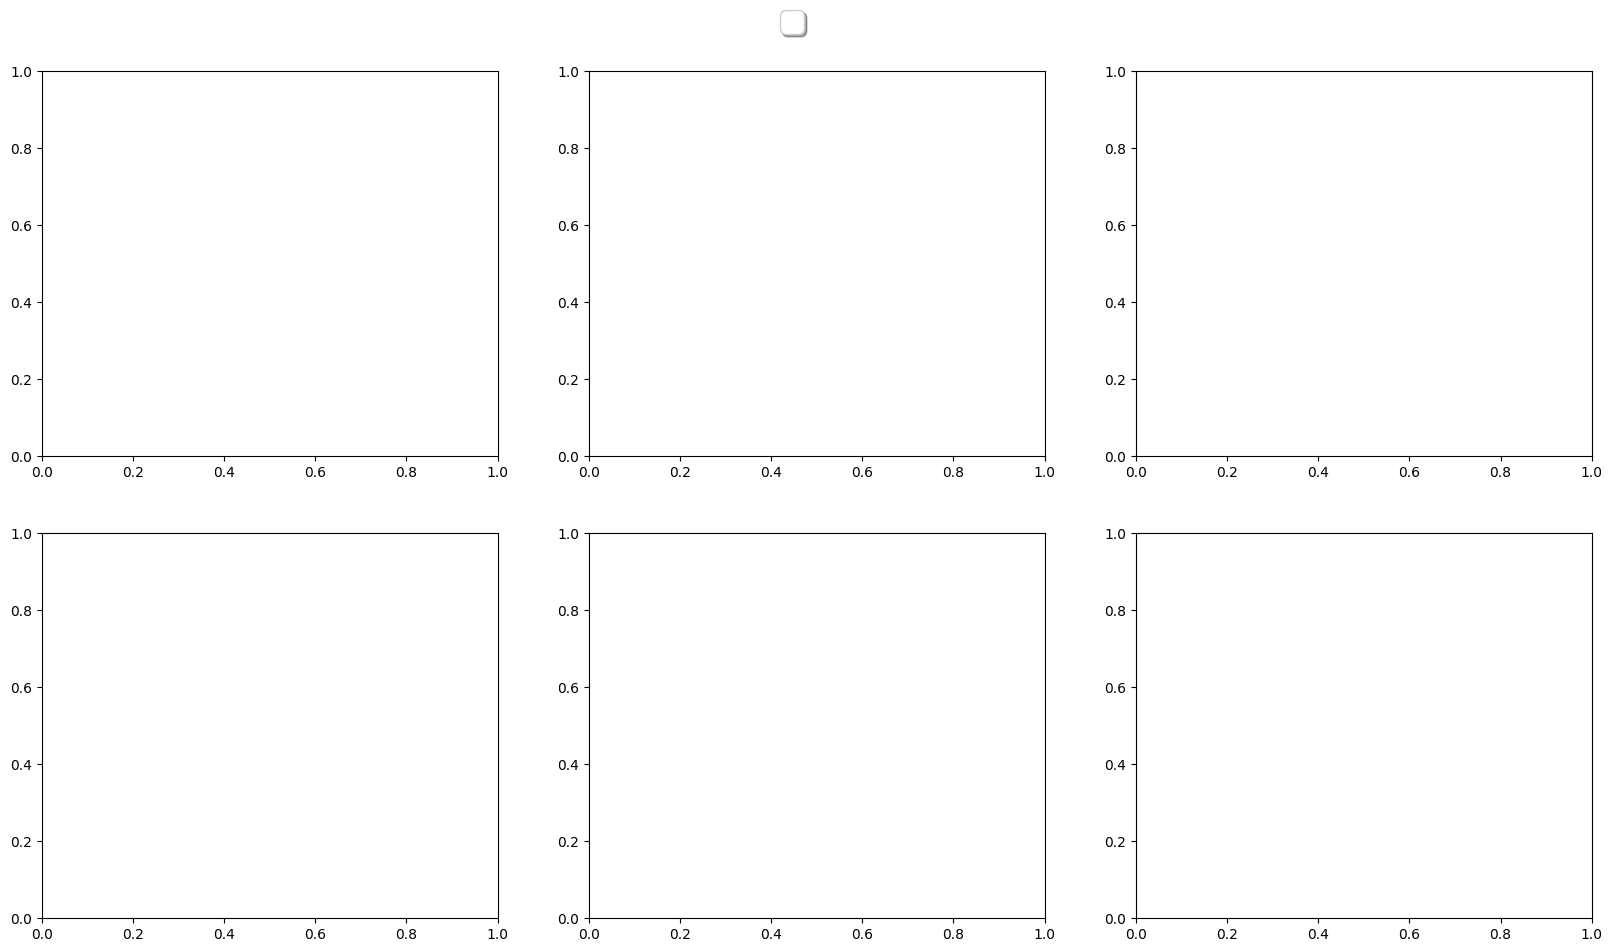

In [44]:
fig, ax_list = plt.subplot_mosaic(
        [["cifar_z", "pnp_z", "airbus_z"], 
        ["cifar_dpca", "pnp_dpca", "airbus_dpca"]],
        figsize=(20, 11))
        # gridspec_kw={
            # set the height ratios between the rows
            # "height_ratios": [1.5, 1.5, 1.5, 2, 2, 2],
            # set the width ratios between the columns
            # "width_ratios": [1, 1, 1, 1],})
h, l = ax_list["pnp_dpca"].get_legend_handles_labels()
lgd = fig.legend(h, l, loc='upper center', bbox_to_anchor=(0.5, 0.95), fancybox=True, shadow=True, ncol=6, fontsize=22)

